# Introduction to Time Series
christopher.overton@galvanize.com  
2016.09.01

## Objectives

* Understand time series within the larger context of forecasting
* How does this compare to other data science tasks?  
* Define key time series concepts  

* Algorithmic techniques:
    - Use Box-Jenkins work-flow to estimate an ARIMA model
    - Describe Exponential Smoothing (ETS) models

* Software:
    - Use graphical tools to analyze time series data
    - Use Python's StatsModels to train and evaluate ARIMA models

### Credits:
* Markdown lecture version stolen from [Benjamin S. Skrainka](skrainka@galvanize.com)
* Some illustrations come from references Hyndman & Athanasopoulos and Shumway & Stoffer

## Agenda

Today's agenda:

* Understand time series within the larger context of forecasting
* How does this compare to other data science tasks?  
* Define key time series concepts and properties
* The ARIMA model: concepts & terminology
* Estimating ARIMA models using Box-Jenkins
* Practical advice        
* Describe ETS model

## References

A couple helpful references, in order of difficulty

*   Hyndman & Athanasopoulos: [Forecasting: principles and practice (free online, last published '12)](https://www.otexts.org/fpp)
*   Shumway & Stoffer: [Time Series & Applications: w. R Examples (4th ed out later in '16)](http://www.stat.pitt.edu/stoffer/tsa4/index.html)   
Enough material for whole year masters course. First chapters included in our readings
*   Box, Jenkins: [Time Series Analysis: forecasting and Control ('08)](https://www.amazon.com/Time-Analysis-Forecasting-Probability-Statistics/dp/1118675029)    
Recent update edition by originators named in famous methodology. Also includes older focus on process control - still very important even as recent texts are more likely to emphasize finance  
*   Hamilton: [Time Series Analysis ('94)](http://press.princeton.edu/titles/5386.html)  
Older and huge, but a classic

### Specialization on economics/finance
*   Tsay [Analysis of Financial Time Series ('10)](https://www.amazon.com/Analysis-Financial-Time-Ruey-Tsay/dp/0470414359)  
Advanced, but below is a more introductory text by the same author (with greater focus on R):
*   Tsay [Introduction to Analysis of Financial Data ('12)](https://www.amazon.com/Introduction-Analysis-Financial-Data/dp/0470890819)  
*   Enders: [Applied Econometric Time Series](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP003218.html)
*   Elliott & Timmermann: [Economic forecasting](http://press.princeton.edu/titles/10740.html)


## A little religion: Python vs. R

In most cases, you can use Python or R, depending on your preference:

* For time series, python still lags behind R, as was more the case for regression before recent evolution in scikit.learn
    -  Use Pandas (or such tools as Spark DataFrames to manipulate data and dates
    -  Use [StatsModels](http://statsmodels.sourceforge.net/devel/tsa.html) for core time series models
    -  As Python becomes more of a de facto standard, it should catch up in ts as well (as is occurring in StatsModels)
* Currently, R is far the better option for TS, and is used my most researchers and textbooks  
    - Hyndman's `forecast` package is outstanding:
        -   Use `lubridate` to manipulate dates
*   Galvanize is a Python shop, so ... we will use Python
    - However, our gU master's program covers this content using R
    - If you are serious about time series and forecasting, use R where appropriate

# Introduction

## Whiteboard example
* What is a time series?
    - Counts vs. discrete events
    - Need enough of them to achieve statistical power
* Time series vs. regression  
    - Use richer time structure
    - Points of interest are "outliers" (as seen from the view of regression)
    - Value of data decays with time -> intuition behind exponential smoothing

##   Time series data

Time series data is a sequence of observations of some quantity of interest, which are collected over time, such as:

* GDP
* The price of toilet paper or a stock
* Demand for a good
* Unemployment
* Web traffic (clicks, logins, posts, etc.)

##   Definition

We assume a time series, $\left\{y_t \right\}$, has the following properties:

*   $y_t$ is an observation of the level of $y$ at time $t$
*   $\left\{y_t \right\}$ is time series, i.e., the collection of observations:
    -   May extend back to $t = 0$ or $t = -\infty$, depending on the problem.
    -   E.g., $t \in \left\{0, ..., T\right\}$
*   Starting after time t, we typically want to forecast y out to a "horizon" h, namely forecasting values $y_{t+1}, y_{t+2}, ... y_{t+h}$.  
To emphasize our knowledge of y up to time t, this can be written as $y_{t+1|t}, y_{t+2|t}, ... y_{t+h|t}$

##  Assumptions

*   Discrete time:
    -   Sampling at regular intervals
    -   ... even if process is continuous
*   Evenly spaced observations
*   No missing observations

## Caveat: a time series is only one realization (within an assumed model)

Time series are hard to model because we only observe one realization of the path of the process:

*   Often have limited data
*   Must impose structure -- such as assumptions about correlation -- in order to model
*   Must project beyond support of the data.

##  Components of a time series

Think of a time series as consisting of several different components:

*   Trend
*   Seasonal
*   "Cyclic" - fluctuations over multiple steps that are not periodic (at a specified seasonality)
*   Everything else is "noise", but we want it as much as possible to be "white noise" - without an discernable structure 

Can be additive or multiplicative


##  Example decomposition from Hyndman et al.

<img alt='<picture>' src='images/hyndman_decomp.png' width=500px />

##  Example time series from Hyndman et al.

<img alt='<picture>' src='images/hyndman.png' width=600px />

## Two popular models

*   ARIMA(p,d,q):
    -   A benchmark model
    -   Captures key aspects of time series data
*   Exponential smoothing (ETS):
    -   Smooths out irregular shocks to model trend and seasonality
    -   Updates forecast with linear combination of past forecast and current value
    -   Also known as a "State space model"

Can also take a machine learning approach ...

##  Notation

Some notation, following Hyndman:

*   $y_t$: the level of some value of interest at time $t$
*   $\epsilon_t$: the value of a shock, $\epsilon$, at time $t$
*   $\hat{y}_{t+h|t}$ is the forecast for $y_{t+h}$ based on the information available at time $t$


##  Lags

Often models use past values to predict future:

*   AR(1): $y_t = \phi \cdot y_{t-1} + \epsilon_t$
*   MA(1): $y_t = \mu + \epsilon_t + \psi \cdot \epsilon_{t-1}$
*   Easier to write with lag operators:  
$\mathbb{L} : x_t \mapsto x_{t-1}$

*   With lag operators:
    -   AR(1): $y_t = \phi \cdot \mathbb{L} y_t + \epsilon_t$
    -   MA(1): $y_t = \mu + (1 + \psi \cdot \mathbb{L}) \epsilon_{t}$

##  Concepts: basic statistics

First, we review some basic statistics:

*   *expectation*:
    -   $\mathbb{E} [g(x)] \equiv \int{g(x) \cdot f(x) dx}$ or: $1/N * \Sigma_{x = 1}^N g(x) \cdot f(x)$
    -   $g(x)$ is an arbitrary function
    -   $f(x)$ is the probability density function  
    -   For time series, time t is usually the variable over which expectation is generated
*	*mean*:
    -   A 'typical' value
    -   $\mu(x_t) = \mathbb{E} [x_t]$   
*   *variance*:
    -   A measure of volatility or the spread of a distribution
    -   $\mathtt{Var}(x_t) = \mathbb{E}[(x_t - \mu(x_t)) * (x_t - \mu(x_t))^T]$
    -   $\sigma^2(x_t) \equiv \mathtt{Var}(x_t)$
*   *standard deviation*:
    -   $\sigma(x_t) \equiv \sqrt{\mathtt{Var}(x_t)}$

## Concepts: time series (1/2)

To understand persistence of a time series, examine:

*	*autocovariance*:
    -   How much a lag predicts a future value of a time series
    -	$\mathtt{acov}(x_t,x_{t-h}) \equiv \mathbb{E} [(x_t - \mu(x_t)) * (x_{t-h} - \mu(x_{t-h})))]$
    -   Often written as $\gamma(s,t)$ or $\gamma(h)$ where $h = s-t$
*	*autocorrelation*:
    -	A dimensionless measure of the influence of one lag upon another
    -   Helps determine which ARIMA model to use  
    $\mathtt{acorr}(x_t) = \dfrac{ \mathtt{acov}(x_t, x_{t+h}) } { \sigma(x_t) \cdot \sigma(x_{t+h}) }$   
    -   Often written as $\rho(t) \equiv \gamma(t) / \gamma(0)$ for this case $y_t = y_{t-1} + \mu + \epsilon_t$

## Concepts: time series (2/2)
Special time series (easier to forecast):
* To forecast, need mean, variance, and correlation to be stable over time
* strictly stationary:  
  ${x_t}$ is strictly stationary $f(x_1,...,x_t)=f(x_{1+h},...,x_{t+h}),\forall h$
* weakly stationary: 
  - mean is constant for all periods: $\mu(x_t) = \mu(x_{t+h}), \forall h$
  - autocorrelation $\rho(s,t)$, depends only on |s - t| 
* white noise:
  - $acov(x_t , x_{t+h}) = var(x_t)$ if h = 0 and 0 otherwise
  - is (weakly) stationary
  - white noise is a key building block of time series models

### Differencing:
*   $d$ is how many times you must difference the series so that it is stationary
*   Usually, $d \in \left\{0, 1, 2\right\}$
*   Differencing should remove the trend component
*   Example: random walk (with drift)
*   Compute differences with `np.diff(n=d)` or  `pd.Series.diff(periods=d)` to turn ARIMA into ARMA.

##  ARIMA models

An ARIMA(p,d,q) is a general model which includes AR, I, and MA:

*   AR(p):  AR of order p
*   I(d):   I of order differencing d
*   MA(q):  MA of order q

Remarks:

*   AR, I, and/or MA may be missing from a general ARIMA model
*   May also include seasonal components ...  Specified as ARIMA(p,d,q)(P,D,Q)L  
This is called "seasonal ARIMA" or SARIMA. Here, the seasonal lags are as many multiples of L as given by P, D, nd Q.
*   If $d = 0 \Rightarrow$ ARIMA becomes ARMA


#   Estimating ARIMA models using Box-Jenkins


## Main Box-Jenkins methodology

1.	Exploratory data analysis (EDA):
    -   plot time series, ACF, PACF
    -   identify hypotheses, models, and data issues
    -   aggregate to an appropriate grain
2.	Fit model(s)
    -	Difference until stationary (possibly at different seasonalities!)
    -   Test for a unit root (Augmented Dicky-Fuller (ADF)): if found, is evidence data still has trend
    -   However: too much differencing causes other problems
    -	Transform until variance is stable
3.	Examine residuals: are they white noise?
4.	Test and evaluate on out of sample data
5.	Worry about:
    -	structural breaks
    -	forecasting for large h with limited data $\Rightarrow$ need a "panel of experts"
    -	seasonality, periodicity

##  Modeling flow chart from Hyndman et al.

<img alt='<hyndman flow chart>', src='images/hyndman_modeling_process.png' width=400px>

New concepts:  
- Box-Cox transform: $x \rightarrow (x^\lambda - 1)/\lambda$ for a choice of $\lambda$ that makes data more nomally distributed (but careful: this makes intuition harder!)
- A portmanteau test refers to statistical machinery to rule out a null hypothesis. For time series, one such is the Lyung-Box test, which decides whether to reject the null hypothesis that a whole set of autocorrelations (as opposed to just one of them) shows no significant structure

## Graphical tools

Plot data to develop understanding of data and possible models:

*   Key diagnostic plots:
    -   Plot time series, $y_t$, vs $t$
    -   Plot autocorrelation function (ACF), i.e., $\rho(h)$ vs. $h$
    -   Plot partial autocorrelation function (PACF)
*   Repeat for first and second differences, if necessary:
    -   Compute differences with `np.diff(n=d)` or  `pd.Series.diff(periods=d)`
    -   Transform series, if necessary, e.g, $y_t \rightarrow \log(y_t)$
    -   Check stationarity: i.e., no trend and constant variance

##  Autocorrelation function (ACF)

Shows likely order of the *MA(q)* part of the ARIMA(p,d,q) model:

*   Plots $\rho(h)$ vs. lags $h$, so 'x-axis' is no longer time t!
*   Find largest significant spike outside of significance bands
*   Consider order *q*, where  q is largest significant lag

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
# from sklearn import datasets

%matplotlib inline

## A random sample

In [52]:
data = sm.tsa.arma_generate_sample(ar=[1, 0.7, 0.0, 0.3], 
                                   ma=[1,0.4, -0.3], nsample=100)
dataAr = sm.tsa.arma_generate_sample(ar=[1, 0.7, 0.0, 0.3], 
                                     ma=[1], nsample=100)
dataMa = sm.tsa.arma_generate_sample(ar=[1], 
                                     ma=[1, 0.4, -0.3], nsample=100)

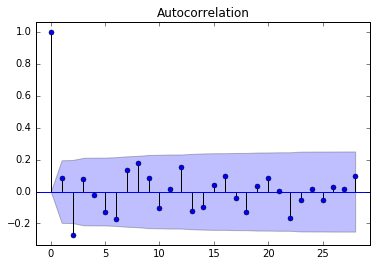

In [60]:
sm.graphics.tsa.plot_acf(dataMa, lags=28, alpha=0.05)
plt.show()

##  Partial autocorrelation function (PACF)

Shows likely order of the *AR(p)* part of the ARIMA(p,d,q) model:

*   Plots partial autocorrelation vs. lags $h$. Again, "x-axis" is not time t.
*   Partial autocorrelation uses a regression method to compute effect of just a single lag h that is not explained by lages 1, 2, 3, ... (h-1). By contrast, ACF at lag h may include effects that are also explainable by intrmediate lags 
*   Consider order *p*, where p = largest significant lag

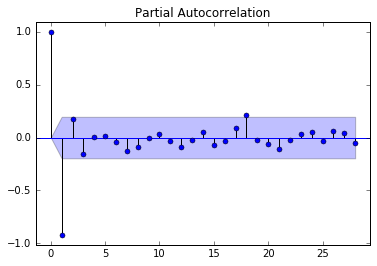

In [61]:
sm.graphics.tsa.plot_pacf(dataAr, lags=28, alpha=0.05)
plt.show()

## Example: plotting series, ACF, and PACF (1/3)

You will do this all the time, so create a helper function:

In [4]:
def ts_diag_plot(data, lags=28):
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(311)
    ax1.plot(data)
    ax1.set_title('y_t vs. t')
    ax2 = fig.add_subplot(312)
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax2)
    ax3 = fig.add_subplot(313)
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax3)
    fig.show()
    return fig

## Example: diagnostic plots (2/3)

In [47]:
#from tsplot import ts_diag_plot

fake = sm.tsa.arma_generate_sample(ar=[1, 0.7, 0.0, 0.3],
    ma=[0.2, -0.1], nsample=100)

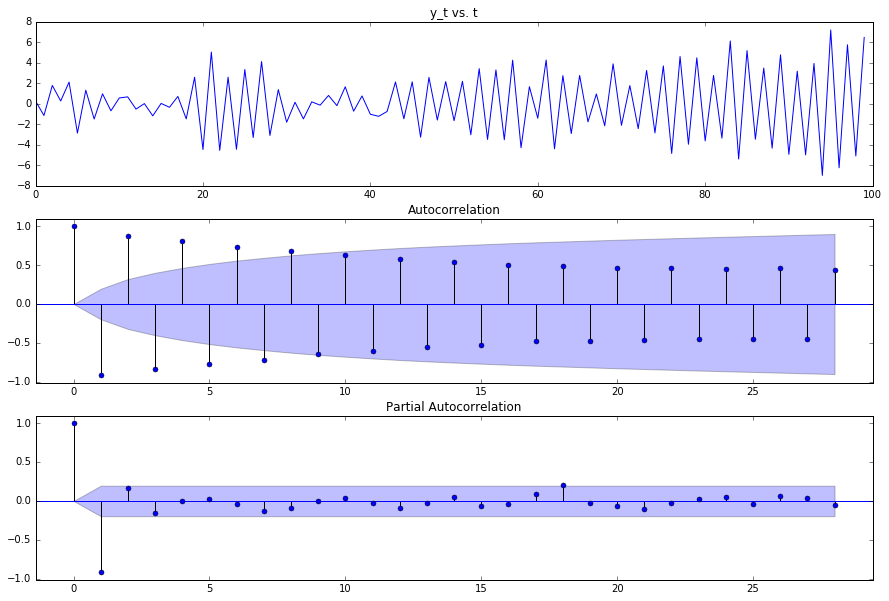

In [66]:
fig = ts_diag_plot(dataAr)

## Example: diagnostic plots (3/3)

<img alt='<Three diagnostic plots>' src='images/3plots.jpg'>

#   Practical advice


## Questions to ask

Look at the time series plots and ask:

*   Is it stationary?
*   Is there a trend?
*   Is the variance stable?
*   Are there seasonal or periodic components?
*   What AR and MA terms are likely present?
*   Are there structural breaks in the data?
*   Do I have enough data to forecast at horizon $h$?

## Stabilizing the time series

You need to stabilize the time series before estimating a model:

*   Transform data to stabilize variance:
    -   $y_t \leftarrow \log(y_t)$
    -   Verify via Box-Cox test
    -   Verify by plotting

*   Transform data so series is stationary:
    -   Compute first or second difference
    -   $y_t \leftarrow \Delta y_t$ or $y_t \leftarrow \Delta^2 y_t$
    -   Verify by portmanteau test


## Fit an ARIMA model

To fit a model:

*   Split data into train set (earlier observations) and test set (later observations)
*   To forecast at horizon $h$, should have at least $3 \times h$ observations to train plus $h$  observations to test:
    -   I.e., you cannot forecast demand in two years if you only have three months of data
    -   If these conditions are violated, you need a 'panel of experts'
    -   More data is better, especially if seasonality is present

*   To identify optimal order of model:
    -   Examine ACF and PACF
    -   Difference until stationary
    -   Number of differences is order $d$ for I(d)
    -   Use `sm.tsa.arma_order_select_ic` to generate and compare several models
    -   Use cross validation

## Example: (1/2)

In [62]:
data2 = sm.datasets.macrodata.load_pandas()
df = data2.data
df.index = pd.Index(
    sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
y = df.m1
X = df[['realgdp', 'cpi']]

In [76]:
model = sm.tsa.ARIMA(endog=y, order=[3,1,1])
# model2 = sm.tsa.ARIMA(endog=y, order=[3,1,1], exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.m1   No. Observations:                  202
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -755.980
Method:                       css-mle   S.D. of innovations             10.193
Date:                Thu, 01 Sep 2016   AIC                           1523.961
Time:                        13:54:39   BIC                           1543.810
Sample:                    06-30-1959   HQIC                          1531.992
                         - 09-30-2009                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.8679      2.509      3.136      0.002         2.951    12.785
ar.L1.D.m1    -0.4212      0.109     -3.871      0.000        -0.634    -0.208
ar.L2.D.m1     0.5756      0.082      7.000      0.000         0.414     0.737
ar.L3.D.m1     0.3304      0.074      4.462      0.000         0.185     0.476
ma.L1.D.m1     0.8341      0.092      9.035      0.000         0.653     1.015
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2429           -0.0000j            1.2429           -0.0000
AR.2           -1.4924           -0.4557j            1.5605           -0.4528
AR.3           -1.4924           +0.4557j            1.5605            0.4528
MA.1           -1.1989           +0.0000j            1.1989            0.5000
-----------------------------------------------------------------------------
"""

## Example: (2/2)

![Example: summary output from ARIMA model](images/arima_summary.png)

## Prediction intervals

A forecast of $\{y_t\}$ at time $t+h$ computes:

*   $\hat{y}_{t+h|t}$, the expected mean of $y_t$ at time $t+h$ conditional on the information available at $t$
*   The *prediction interval*
    -   Contains future realization of the mean $y_{t+h}$ with probability $1 - \alpha$
    -   Increases the further you forecast into the future
*   **A prediction interval is not a confidence interval**:
    -   A prediction interval contains the future realization of a random variable with $\Pr = 1 - \alpha$
    -   A confidence interval contains the true value of a parameter with $\Pr = 1 - \alpha$
*   See Hyndman's blog [post](http://robjhyndman.com/hyndsight/intervals/) for further discussion

## Forecasting

Can use `results.forecast` to compute out of sample predictions:

*   Use `alpha` to choose appropriate prediction interval, e.g., 80%, 90%, 95%, etc.
*   Do not use the prediction interval to forecast quantiles of $\hat{y}_{t+h|t}$
*   Note:   documentation incorrectly refers to the *prediction interval* as the *confidence interval*
*   Can supply (forecasted) value of exogenous predictors

In [ ]:
h = 5 #desired forecast window:
y_hat, stderr, pred_int = results.forecast(steps=h, alpha=0.05)

## Forecast: prediction intervals

Prediction plot includes a *prediction interval*:

*   Contains future realization of $y_{t+h}$ with probability $1 - \alpha$
*   A prediction interval is not a confidence interval

/Users/christopher.overton/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


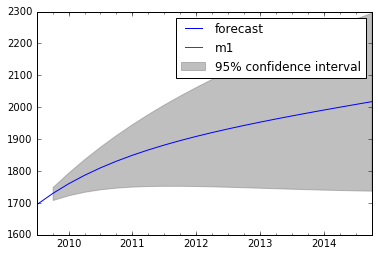

In [7]:
results.plot_predict('2009Q3', '2014Q4', dynamic=True,
    plot_insample=True)
plt.show()

## Example: prediction intervals

![Prediction plot](images/predict.jpg)

## Evaluate

"Trust, but verify":

*   Check residuals are white noise:
    -   Examine ACF & PACF
    -   Compute portmanteau (Box-Pierce, Box-Ljung) test to see if residuals are correlated
*   Check solver converged!
*   Remember: simple models often outperform fancy models on new data
*   Compare any forecast against the benchmark forecast
    -   Choose a benchmark such as mean or random walk with drift
    -   Fit model on training set and evaluate on test set
    -   To compare multiple forecasts, use a sliding window

## Common metrics

It is common to use several metrics for evaluation:

*   *Root mean squared error*:

$$RMSE \equiv \sqrt{\dfrac{1}{H} \sum{(y_{t+h} - \hat{y}_{t+h|t})^2}}$$

*   *Mean absolute error*:

$$MAE \equiv \dfrac{1}{H} \sum{|y_{t+h} - \hat{y}_{t+h|t}|}$$

*   *Mean absolute percentage error*:

$$MAPE \equiv \dfrac{1}{H} \sum{\left|\dfrac{y_{t+h} - \hat{y}_{t+h|t}}{y_{t+h}}\right|}$$

## Model selection

Use information criterion to evaluate models:

*   Several information criteria exist: AIC, **AICc**, BIC
    -   Essentially, log-likelihood plus penalty for adding parameters
    -   Measures fit vs. parsimony of model
    -   Different criteria have different finite sample properties
*   Choose model with lowest information criterion
*   Especially helpful if you have limited data
*   Popular, pre-ML method, but consider cross-validation if you have enough data

## Tips & Tricks

Some hard won wisdom:

*   Work at the appropriate level of aggregation (grain):
    -   Don't use 5 minute resolution data to forecast at $h$ = one month
*   Don't forecast beyond what the data will support
    -   You should have $4\times h$ amount of data to forecast at horizon $h$
*   Err on the side of simplicity
*   Or, take a machine learning approach:
    -   Try a set of lags and differences plus other predictors
    -   Use regularization and/or variable selection
    -   See Taieb & Hyndman for an approach which uses boosting.

## Advanced ARIMA techniques

For more complicated situations:

*   Add Fourier terms to capture periodic behavior
*   Add other covariates which can improve prediction
*   Use a vector autoregressive integrated moving average model (VARIMA) to capture dynamics of a system of equations

# Exponential smoothing (ETS) models

### Basic idea of exponential smoothing
In "simple exponential smoothing" ("SES"):  
$\hat{y}_{t+1|t} = \alpha y_t +(1 - \alpha) \hat{y}_{t|t−1}$  
This means $\hat{y}_{t+1|t} = \alpha y_t +(1 - \alpha)\alpha y_{t-1} + (1 - \alpha)^2 \hat{y}_{t-1|t−2}$  
...   
$= \alpha y_t +(1 - \alpha)\alpha y_{t-1} + (1 - \alpha)^2\alpha y_{t-2} + (1 - \alpha)^3\alpha y_{t-3} + ... +$ last term

A given term $y_t$ affects all subsequent values $y_{t+i}$, but this contribution decreases as i increases.
   - Specifically, this weight decays exponentially - hence the name of the method

The "smoothing parameter" α determines how much weight you give to immediately preceding term  

So higher α means 1) a noisier series 2) that updates more quickly

![<simple exponential smoothing>](images/ses.png)

##   ETS: introduction

Exponential smoothing models are a benchmark model:

*   Robust performance
*   Easy to explain to non-technical stakeholders
*   Easy to estimate with limited computational resources
*   Forecast well because of parsimony

## The model

The ETS model consists of smoothing equations for

*   Forecast and Level (the "E" part)
*   Trend (optional "T")
*   Seasonality (optional "S")

Each of these can be either additive or multiplicative.  

Although the main goal is to model and predict $y_t$, ETS models a 'state space' of these hidden variables

## Example: simple exponential smoothing -- ETS(ANN)

Simple exponential smoothing updates forecast based on latest realization of $y_t$:

*   Forecast equation:  $\hat{y}_{t+1|t} = \ell_t$
*   Level equation: $\ell_t = \alpha \cdot y_t + (1-\alpha) \cdot \ell_{t-1}$

If $y_t = \hat{y}_{t|t-1} + \epsilon_t$, can use *error correction* formulation:

*   $y_t = \ell_{t-1} + \epsilon_t$
*   $\ell_t = \ell_{t-1} + \alpha \cdot \epsilon_t$  

In this simplest of the ETS models, the underlying "state" is $\ell_t$.   It is "smoothed" (less noisy) than $y_t$ by the proportion $\alpha$

## Example: Holt's linear model ("double exponntial smoothing") -- ETS(AAN)

ETS(AAN) adds slope to the model to better handle a trend:

*   Forecast equation:  $\hat{y}_{t+h|t} = \ell_t + h \cdot b_t$
*   Level equation: $\ell_t = \alpha \cdot y_t + (1-\alpha) \cdot (\ell_{t-1} + b_{t-1})$
*   Trend equation: $b_t = \beta^* \cdot (\ell_t - \ell_{t-1}) + (1 - \beta^* ) \cdot b_{t-1}$

Notes:
* Modeling the trend automates differencing (the "I" part of ARIMA)
* Here the state consists of two variables, level (as before) and trend (default incremental change)
* Each of these two state variables is an exponentially smoothed series with its own decay parameter

## Example: The gory details for additive Holt-Winters, including seasonality -- ETS(AAA)
The following addition is due to Winters - one extra equation, with new terms for forecast and level: 
*   Forecast equation:  $\hat{y}_{t+h|t} = \ell_t + h \cdot b_t + s_{t-m+h^+}$
*   Level equation: $\ell_t = \alpha \cdot (y_t - s_{t-m}) + (1-\alpha) \cdot (\ell_{t-1} + b_{t-1})$
*   Trend equation: $b_t = \beta^* \cdot (\ell_t - \ell_{t-1}) + (1 - \beta^* ) \cdot b_{t-1}$
*   Seasonality equation: $s_t = \gamma \cdot (y_t - \ell_{t-1} - b_{t-1}) + (1-\gamma) \cdot s_{t-m}$

Interestingly, this model develops state for each of the m possible seasonalities, but at the cost of only one new exponential decay parameter $\gamma$  
Here, $h^+$ is 1 + the "floor" of (greatest integer not exceeding) $(h-1)$ mod $m$, which takes the latest available seasonality from the training set  

## Alternate forms for each of the E, T, and S components

In the last example, all formulas above use additive effects (hence the "A"'s), but could be changed to be multiplicative (which would be labeled "M) 

Also, either additive or multiplicative components can be exponentially decayed ("damped") to revert over time to neutral values: 0 if additive, and 1 if multiplicative. These are written $A_d$ and $M_d$

For both of these, see the references (e.g. Hyndman) for formulas

## Hyndman's taxonomy

Hyndman categorizes exponential smoothing models as ETS:

*   *E* for type of error
*   *T* for type of trend
*   *S* for type of seasonality

For each of these, one may choose:

*   *A* for additive
*   *M* for multiplicative
*   *N* for none
*   *$A_d$* for additive damped
*   *$M_d$* for multiplicative damped

The three preceeding examples combine varying "A" and "N" components.

For the "Autralian electricity production" example near the start of the lecture, a multiplicative model like ETS(MMM) seems more appropriate.

## The ETS model

Python provides partial support for ETS:

*   See Panda's `pandas.stats.moments.ewma`
*   User unfriendly
*   Best to use R's `ets` function in the `forecast` package

## ETS vs. ARIMA

ARIMA features & benefits:

*   Benchmark model for almost a century
*   Much easier to estimate with modern computational resources
*   Easy to diagnose models graphically
*   Easy to fit using Box-Jenkins methodology

ETS features & benefits:

*   Can handle non-linear and non-stationary processes
*   Can be computed with limited computational resources
*   Not always a subset of ARIMA
*   Easier to explain to non-technical stakeholders

## Important topics not covered in today's talk
* So far, we have been trying to model only the internal structure of a single time series $y_t$. In general, we might care about multiple time series $y_{(i, t)}$, which may depend both on each other and on additional time series, such as inputs and hidden "state" series.
    - One popular approach to this is the Kalman filter. At a more basic level, we can generalize ARIMA to "VARIMA" (a vector autoregression model)
* Just as time has internal structure, so might other continuous features like spatial variables. Some recent research develops a unified framework for these - notably [Cressie & Wikle: Statistics for Spatio-Temporal Data (11)](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP002348.html)  
* Time series and its practitioners often integrate poorly with other ML specialties. I expect more bridges between the two camps over the next decade. Examples to date include clustering of time series, such as via parametric features time series or via distance metrics.

##  Summary

You should now be able to answer the following questions:

*   What are the steps in the Box-Jenkins's approach?
*   How much data do I need to forecast at horizon $h$?
*   How should I evaluate a forecast?
*   What are the benefits of ARIMA vs. ETS?